In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary.csv


In [2]:
#to see the data
data= pd.read_csv("/kaggle/input/salary/Salary.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
#to find the null values in the dataset
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
#to find the mean,min,max,etc..
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


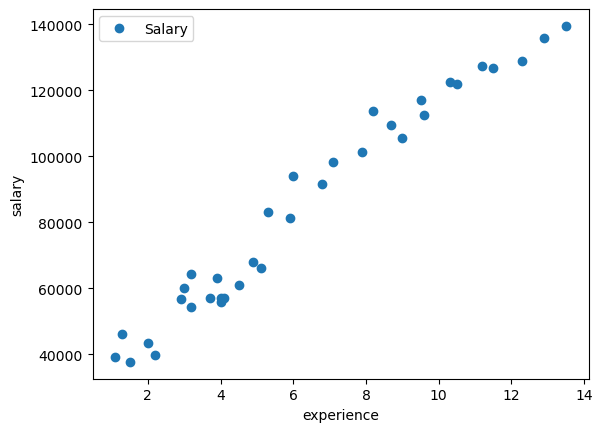

In [5]:
#plotting the values for the visual
import matplotlib.pyplot as plt
data.plot(x="YearsExperience",y="Salary",style='o')
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

In [6]:
#seperate the x,y values
x=pd.DataFrame(data["YearsExperience"])
y=pd.DataFrame(data["Salary"])

In [7]:
#spliting the values 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 1)
(7, 1)
(28, 1)
(7, 1)


In [9]:
#LinearRegression
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [10]:
#find the coef
print(reg.coef_)

[[8703.14521572]]


In [11]:
print(reg.intercept_)

[28838.06044786]


In [12]:
y_pred = reg.predict(x_test)

In [13]:
print(y_pred)

[[ 68002.21391858]
 [ 81056.93174216]
 [ 46244.35087929]
 [120221.08521288]
 [141108.6337306 ]
 [118480.45616974]
 [ 97592.90765202]]


In [14]:
y_test

,Salary
14,61111
19,93940
3,43525
29,121872
33,135675
28,122391
22,101302


In [15]:
from sklearn import metrics
print("mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error 5313.973964525432
mean squared error 40308108.63707036
root mean squared error 6348.866720688848


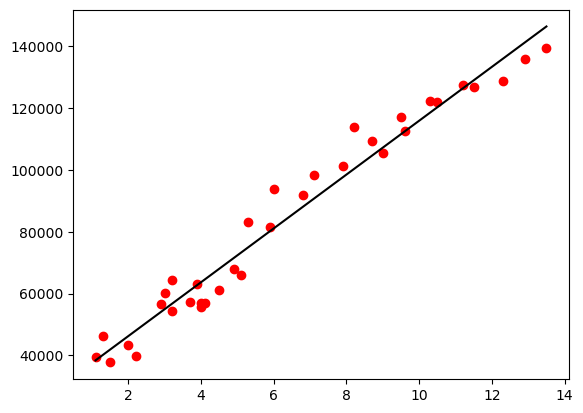

In [16]:
plt.scatter(x,y,color='r')
plt.plot(x,reg.predict(x),color="black")
plt.show()

In [17]:
from sklearn.metrics import r2_score


In [18]:
r2_score(y_test,y_pred)

0.9593108462602296

As we get a r2_score 0.95, We can conclude that our model is  good. We can say that our model predict 95% accurately.

So, I created a Dataset of Years of Experience by myself to predict the salary.

In [19]:
new_year_of_experience = [10,22,9,6,4]
new_data = pd.DataFrame({"YearsExperience":new_year_of_experience})
predicted_salary = reg.predict(new_data)

In [20]:
print(predicted_salary)

[[115869.51260502]
 [220307.25519362]
 [107166.36738931]
 [ 81056.93174216]
 [ 63650.64131073]]
